In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

In [12]:
digits = load_digits()

In [13]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [36]:
digits.data[4]

array([ 0.,  0.,  0.,  1., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  8.,
        0.,  0.,  0.,  0.,  0.,  1., 13.,  6.,  2.,  2.,  0.,  0.,  0.,
        7., 15.,  0.,  9.,  8.,  0.,  0.,  5., 16., 10.,  0., 16.,  6.,
        0.,  0.,  4., 15., 16., 13., 16.,  1.,  0.,  0.,  0.,  0.,  3.,
       15., 10.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.])

In [35]:
digits.images[4]

array([[ 0.,  0.,  0.,  1., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  7.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  6.,  2.,  2.,  0.],
       [ 0.,  0.,  7., 15.,  0.,  9.,  8.,  0.],
       [ 0.,  5., 16., 10.,  0., 16.,  6.,  0.],
       [ 0.,  4., 15., 16., 13., 16.,  1.,  0.],
       [ 0.,  0.,  0.,  3., 15., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16.,  4.,  0.,  0.]])

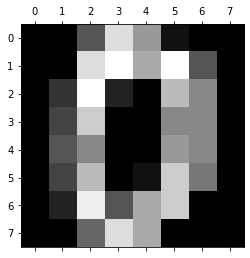

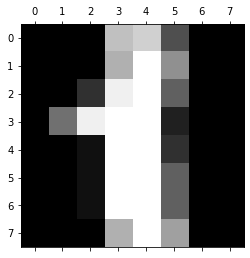

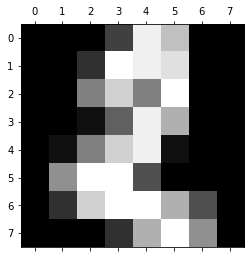

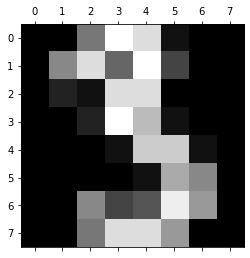

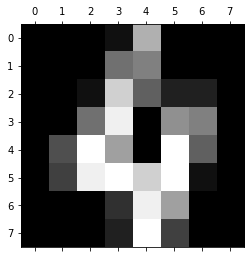

In [17]:
for i in range(5):
    plt.matshow(digits.images[i])

In [18]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [19]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=10)

In [29]:
len(x_test)

360

In [30]:
len(x_train)

1437

## Importing Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model = LogisticRegression()

In [33]:
model.fit(x_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
model.score(x_test, y_test)

0.9583333333333334

## Predicting Digits

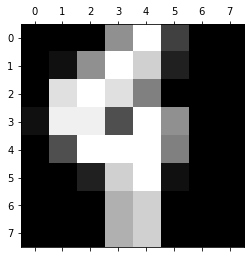

In [37]:
plt.matshow(digits.images[87])

In [38]:
digits.target[87]

4

In [39]:
model.predict([digits.data[87]])

array([1])

###### This prediction is wrong. It is not 1. It should be 4. 

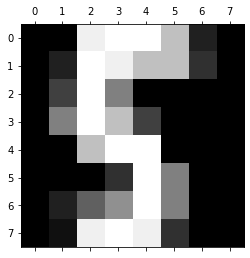

In [43]:
plt.matshow(digits.images[109])

In [44]:
digits.target[109]

5

In [45]:
model.predict([digits.data[109]])

array([5])

###### This prediction is correct.

## Creating a Confusion Matrix 

#### The purpose of this matrix is to see the relationship between the truth value and the predicted value from our value. 
#### It is compared against each other inside a matrix.
#### It shows how many times did our model predict the value of our "hand-written" number which turns out to be CORRECT and also the WRONG value.
#### For more information, you can check the documentation or search it up in Google.

In [47]:
y_predicted = model.predict(x_test)
from sklearn.metrics import confusion_matrix

In [48]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 39,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0, 31,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0, 31,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 39,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  3, 35]], dtype=int64)

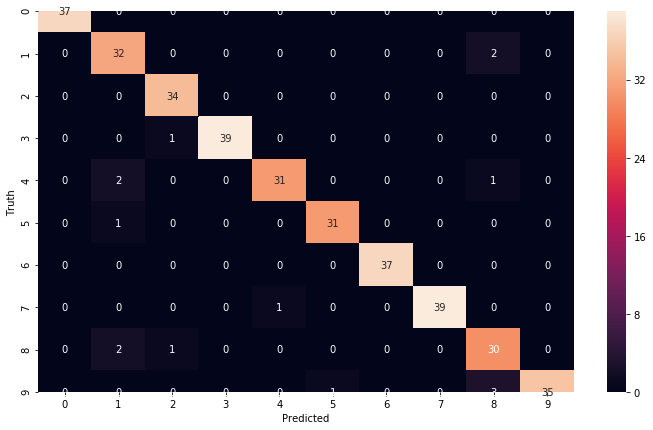

In [55]:
import seaborn as sns 
plt.figure(figsize = (12,7))
sns.heatmap(cm, annot=True)
plt.ylabel('Truth')
plt.xlabel('Predicted')
plt.show()